# Visualizing the LC place of publication data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use("seaborn-v0_8-colorblind")
plt.rcParams["font.family"] = "EB Garamond"
plt.rcParams["figure.figsize"] = [3.54 * 2, 3.54]

In [3]:
df = pd.read_csv("../data/data.csv")

In [4]:
plot_df = (
    df[df["min_year"] >= 1750]
    .groupby(["min_year", "target_city"])
    .size()
    .unstack()
    .fillna(0)
    .rolling(5)
    .mean()
)

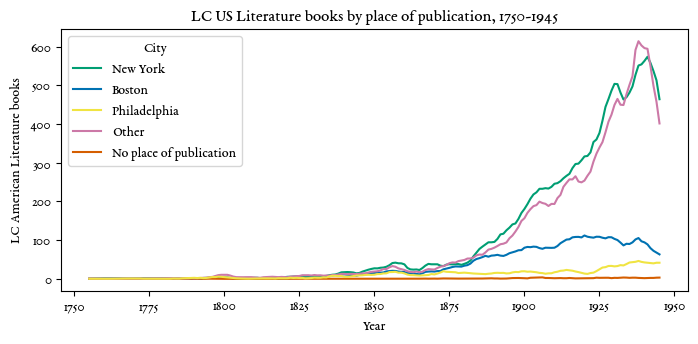

In [5]:
ax = plot_df.plot(kind="line")

# Reorder legend
handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 4, 3, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title="City")

ax.set_ylabel("LC American Literature books")
ax.set_xlabel("Year")
ax.set_title("LC US Literature books by place of publication, 1750-1945")
ax.figure.tight_layout()
ax.figure.savefig("../results/lc_ps_city.png", dpi=600)

In [6]:
plot_df = (
    df[(df["min_year"] >= 1820) & (df["min_year"] <= 1920)]
    .groupby(["min_year", "target_city"])
    .size()
    .unstack()
    .fillna(0)
    .rolling(5)
    .mean()
)

In [7]:
# normalize values
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100

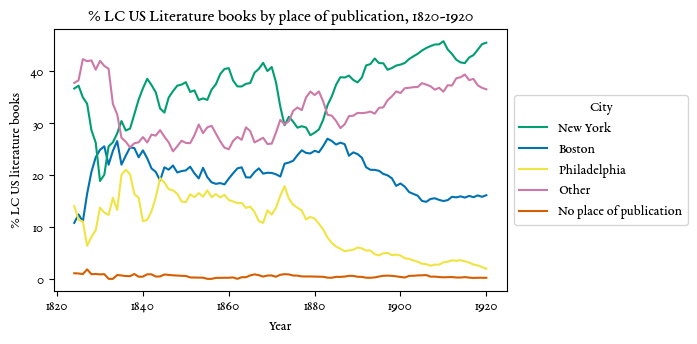

In [8]:
ax = plot_df.plot(kind="line")

# Reorder legend
handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 4, 3, 2]
ax.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    title="City",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

ax.set_ylabel("% LC US literature books")
ax.set_xlabel("Year")
ax.set_title("% LC US Literature books by place of publication, 1820-1920")
ax.figure.tight_layout()
ax.figure.savefig("../results/lc_city_year_normed.png", dpi=600)